In [1]:
!pip install maze_dataset einops

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 30.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 25.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 54.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 45.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 KB 3.6 MB/

In [11]:
!pip install torchvision diffusers 

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 17.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 KB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 KB 6.3 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
pip install accelerate

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.0/345.0 KB 5.2 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy<1.15

/bin/bash: line 1: 1.15: No such file or directory
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from maze_dataset import MazeDataset, MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators

cfg: MazeDatasetConfig = MazeDatasetConfig(
	name="test", # name is only for you to keep track of things
	grid_n=16, # number of rows/columns in the lattice
	n_mazes=10000, # number of mazes to generate
	maze_ctor=LatticeMazeGenerators.gen_dfs, # algorithm to generate the maze
    maze_ctor_kwargs=dict(do_forks=False), # additional parameters to pass to the maze generation algorithm
)
dataset: MazeDataset = MazeDataset.from_config(cfg)


/home/k/kavishs/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/k/kavishs/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset, Subset
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from maze_dataset.plotting import MazePlot
import importlib
import torch.nn.functional as F
from torch.cuda.amp import autocast, GradScaler
import torch.quantization
import random

/home/k/kavishs/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
BATCH_SIZE = 16
LEARNING_RATE = 1e-4
EPOCHS = 150
LATENT_CHANNELS = 4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


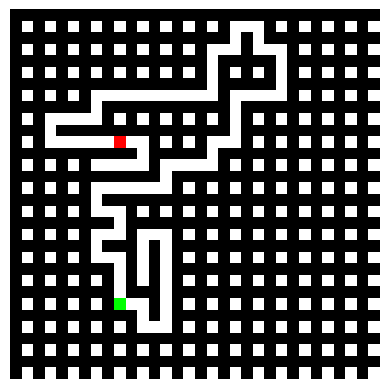

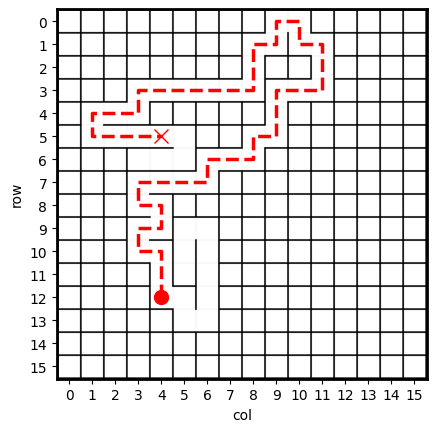

In [ ]:
def preprocess_image(image, target_size=32):
    image = np.array(image)

    # scale_factor = target_size // image.shape[0]

    # image = np.kron(image, np.ones((scale_factor, scale_factor, 1)))

    image = image.astype(np.float32) / 127.5 - 1
    image = torch.tensor(image).permute(2, 0, 1)

    return image

def remove_sol(dataset):
    new_dataset = []
    for i in dataset:
        img = i.as_pixels()
        mask = np.all(img == [0, 0, 255], axis=-1)
        img[mask] = [255, 255, 255]
        img = img[:-1, :-1]
        new_dataset.append(preprocess_image(img))

        # new_dataset.append(img)
    return new_dataset

new_dataset = remove_sol(dataset)
plt.imshow(new_dataset[0].permute(1, 2, 0).cpu().numpy(), cmap='gray')
plt.axis('off')
plt.show()

MazePlot(dataset[0]).plot()

class MazeTensorDataset(Dataset):
    def __init__(self, images):
        self.images = images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx]

# Create DataLoader
dataset = MazeTensorDataset(new_dataset)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

calibration_indices = random.sample(range(len(dataset)), 500)
calibration_subset = Subset(dataset, calibration_indices)

# # Calibration loader
# calibration_loader = DataLoader(
#     calibration_subset,
#     batch_size=16,
#     shuffle=False,
#     num_workers=2
# )                       

In [5]:
from torchvision import models, transforms
from diffusers import AutoencoderKL


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
class VGG16Encoder(nn.Module):
    def __init__(self, latent_shape=(4, 32, 32), freeze=True):
        super(VGG16Encoder, self).__init__()
        vgg16 = models.vgg16(pretrained=True)
        self.features = vgg16.features
        self.latent_shape = latent_shape
        latent_dim = latent_shape[0] * latent_shape[1] * latent_shape[2]

        if freeze:
            for param in self.features.parameters():
                param.requires_grad = False

        self.pool = nn.AdaptiveAvgPool2d((4, 4))
        self.fc = nn.Linear(512 * 4 * 4, latent_dim)

    def forward(self, x):
        x = self.features(x)  # (batch, 512, H', W')
        x = self.pool(x)     # (batch, 512, 4, 4)
        x = x.view(x.size(0), -1)  # Flatten: (batch, 512*4*4)
        x = self.fc(x)       # (batch, latent_dim)
        x = x.view(x.size(0), *self.latent_shape)  # (batch, 4, 32, 32)  --> Match decoder input
        return x


# class TinyEncoder(nn.Module):
#     def __init__(self, latent_shape=(4, 32, 32)):
#         super(TinyEncoder, self).__init__()
#         self.latent_shape = latent_shape
#         latent_dim = int(np.prod(latent_shape))

#         self.conv = nn.Sequential(
#             nn.Conv2d(3, 32, 4, 2, 1), nn.ReLU(),  # Downsample 2x
#             nn.Conv2d(32, 64, 4, 2, 1), nn.ReLU(), # Downsample 2x
#             nn.Conv2d(64, 128, 4, 2, 1), nn.ReLU(), # Downsample 2x
#             nn.Conv2d(128, 256, 4, 2, 1), nn.ReLU(), # Downsample 2x
#         )
#         self.fc = nn.Linear(256 * 16 * 16, latent_dim)  # Assuming input 256x256 -> 16x16 feature map

#     def forward(self, x):
#         x = self.conv(x)
#         x = x.view(x.size(0), -1)
#         x = self.fc(x)
#         x = x.view(x.size(0), *self.latent_shape)
#         return x

In [7]:
class VGG16QuantizedEncoder(nn.Module):
    def __init__(self, latent_shape=(4, 32, 32)):
        super(VGG16QuantizedEncoder, self).__init__()
        vgg16 = models.vgg16(pretrained=True)

        # Keep feature extractor
        self.features = vgg16.features
        self.pool = nn.AdaptiveAvgPool2d((4, 4))  # Downsampling

        latent_dim = latent_shape[0] * latent_shape[1] * latent_shape[2]
        self.fc = nn.Linear(512 * 4 * 4, latent_dim)

        self.latent_shape = latent_shape

        # Quantization stubs (needed for static quantization)
        self.quant = torch.quantization.QuantStub()
        self.dequant = torch.quantization.DeQuantStub()

    def forward(self, x):
        x = self.quant(x)             # Quantize input
        x = self.features(x)          # VGG16 features
        x = self.pool(x)              # Adaptive pooling
        x = x.view(x.size(0), -1)     # Flatten
        x = self.fc(x)                # FC layer to latent
        x = x.view(x.size(0), *self.latent_shape)  # Reshape to latent shape
        x = self.dequant(x)           # Dequantize output
        return x

    def fuse_model(self):
        # Fuse Conv + ReLU to improve quantization efficiency
        for idx in range(len(self.features)):
            if isinstance(self.features[idx], nn.Conv2d) and isinstance(self.features[idx + 1], nn.ReLU):
                torch.quantization.fuse_modules(self.features, [str(idx), str(idx + 1)], inplace=True)

In [ ]:
def prepare_quantized_encoder(device='cpu'):
    # Instantiate and prepare model
    encoder = VGG16QuantizedEncoder().to(device)
    encoder.eval()

    # Fuse Conv + ReLU
    encoder.fuse_model()

    encoder.qconfig = torch.quantization.get_default_qconfig('fbgemm')

    # Prepare for quantization
    encoder_prepared = torch.quantization.prepare(encoder, inplace=False)

    return encoder_prepared

def calibrate_encoder(encoder_prepared, calibration_loader, device='cpu'):
    encoder_prepared.eval()
    with torch.no_grad():
        for batch in calibration_loader:
            x = batch.to(device)
            _ = encoder_prepared(x)  # Forward pass to calibrate

def convert_quantized_encoder(encoder_prepared):
    # Convert to fully quantized model
    encoder_int8 = torch.quantization.convert(encoder_prepared, inplace=False)
    return encoder_int8



In [9]:
from diffusers import AutoencoderKL

class MazeVAEDecoder(nn.Module):
    def __init__(self, pretrained_model='CompVis/stable-diffusion-v1-4', device='cuda'):
        super(MazeVAEDecoder, self).__init__()
        self.vae = AutoencoderKL.from_pretrained(pretrained_model, subfolder="vae",torch_dtype=torch.float16
).to(device)

    def forward(self, latent_vector):
        return self.vae.decode(latent_vector).sample  # Output in image space

# from diffusers import AutoencoderKL

# class MazeVAEDecoder(nn.Module):
#     def __init__(self, pretrained_model='CompVis/stable-diffusion-v1-4'):
#         super(MazeVAEDecoder, self).__init__()
#         self.vae = AutoencoderKL.from_pretrained(
#             pretrained_model, 
#             subfolder="vae", 
#             torch_dtype=torch.float16
#         ).cpu()  # Load to CPU to save VRAM

#     def forward(self, latent_vector):
#         with torch.no_grad():  # No gradients needed for decoder
#             return self.vae.decode(latent_vector).sample


In [ ]:
# Instantiate Encoder and Decoder
encoder = VGG16Encoder(latent_shape=(4, 32, 32), freeze=True).to(device)
# encoder_prepared = prepare_quantized_encoder(device=device)
# #calibrate_encoder(encoder_prepared, calibration_loader, device=device)  # Optional but recommended
# encoder_quantized = convert_quantized_encoder(encoder_prepared).to(device)

decoder = MazeVAEDecoder(pretrained_model='CompVis/stable-diffusion-v1-4', device=device).to(device)

for param in decoder.parameters():
    param.requires_grad = False

# Optimizer
optimizer = optim.Adam(list(encoder.parameters()), lr=1e-4)

scaler = GradScaler()

# Loss
def reconstruction_loss(x, x_hat):
    return nn.functional.mse_loss(x_hat, x, reduction='sum') / x.size(0)

# from torch.cuda.amp import autocast, GradScaler
# import gc

# # --- Hyperparams ---
# EPOCHS = 20
# ACCUMULATION_STEPS = 4  # Effective batch size multiplier
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# latent_shape = (4, 32, 32)

# encoder = TinyEncoder(latent_shape=latent_shape).to(device)
# decoder = MazeVAEDecoder(pretrained_model='CompVis/stable-diffusion-v1-4')  # On CPU

# optimizer = optim.Adam(encoder.parameters(), lr=1e-4)
# scaler = GradScaler()

# def reconstruction_loss(x, x_hat):
#     return nn.functional.mse_loss(x_hat, x, reduction='sum') / x.size(0)

# train_losses = []
# for epoch in range(EPOCHS):
#     encoder.train()
#     train_loss = 0.0

#     for batch_idx, x in enumerate(dataloader):  # Assuming you have a DataLoader
#         x = x.to(device)
#         batch_size = x.size(0)

#         with autocast(dtype=torch.float16):
#             latent = encoder(x)               # Encode
#             x_hat = decoder(latent).to(device)  # Decode (move back to GPU for loss)

#             loss = reconstruction_loss(x, x_hat) / ACCUMULATION_STEPS  # Normalize for accumulation

#         scaler.scale(loss).backward()

#         # Gradient accumulation
#         if (batch_idx + 1) % ACCUMULATION_STEPS == 0:
#             scaler.step(optimizer)
#             scaler.update()
#             optimizer.zero_grad()

#         train_loss += loss.item() * batch_size * ACCUMULATION_STEPS  # Un-normalize for reporting

#     # Average loss
#     train_loss /= len(dataloader.dataset)
#     train_losses.append(train_loss)
#     print(f"Epoch [{epoch+1}/{EPOCHS}], Train Loss: {train_loss:.4f}")

#     # --- Clean up memory ---
#     torch.cuda.empty_cache()
#     gc.collect()


/tmp/ipykernel_47099/3107256328.py:15: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


In [12]:
!nvidia-smi

Thu Mar 13 01:55:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla V100-PCIE-16GB           Off |   00000000:3B:00.0 Off |                    0 |
| N/A   45C    P0             40W /  250W |    1106MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
train_losses = []
for epoch in range(EPOCHS):
    encoder.train()
    decoder.train()
    train_loss = 0.0

    for batch_idx, x in enumerate(dataloader):
        x = x.to(device)
        batch_size = x.size(0)

        optimizer.zero_grad()

        with autocast():  # Mixed precision
            latent = encoder(x)                # (batch, 4, 32, 32)
            x_hat = decoder(latent)            # (batch, 3, 256, 256)

            # x_hat_resized = torch.nn.functional.interpolate(x_hat, size=(x.shape[2], x.shape[3]), mode='bilinear', align_corners=False)

            x_resized = torch.nn.functional.interpolate(x, size=(256, 256), mode='bilinear', align_corners=False)

            # Compute Loss
            loss = reconstruction_loss(x_resized, x_hat)

        # Backprop with scaler
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_loss += loss.item() * batch_size

    train_loss /= len(dataloader.dataset)
    train_losses.append(train_loss)
    print(f"Epoch [{epoch+1}/{EPOCHS}], Train Loss: {train_loss:.4f}")


/tmp/ipykernel_47099/3523259055.py:14: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Mixed precision


OutOfMemoryError: CUDA out of memory. Tried to allocate 512.00 MiB. GPU 0 has a total capacity of 15.77 GiB of which 254.19 MiB is free. Including non-PyTorch memory, this process has 15.51 GiB memory in use. Of the allocated memory 14.49 GiB is allocated by PyTorch, and 647.43 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)